## Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
dir(cancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
cancer.data.shape

(569, 30)

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
df=pd.DataFrame(cancer['data'], columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit(df).transform(df)

In [8]:
df[1]

array([ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,  1.90870825e+00,
       -8.26962447e-01, -4.87071673e-01, -2.38458552e-02,  5.48144156e-01,
        1.39236330e-03, -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
        2.63326966e-01,  7.42401948e-01, -6.05350847e-01, -6.92926270e-01,
       -4.40780058e-01,  2.60162067e-01, -8.05450380e-01, -9.94437403e-02,
        1.80592744e+00, -3.69203222e-01,  1.53512599e+00,  1.89048899e+00,
       -3.75611957e-01, -4.30444219e-01, -1.46748968e-01,  1.08708430e+00,
       -2.43889668e-01,  2.81189987e-01])

In [9]:
df.shape

(569, 30)

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [11]:
X=pca.fit(df).transform(df)
X.shape

(569, 2)

In [12]:
type(cancer['target']), (cancer['target'].shape)

(numpy.ndarray, (569,))

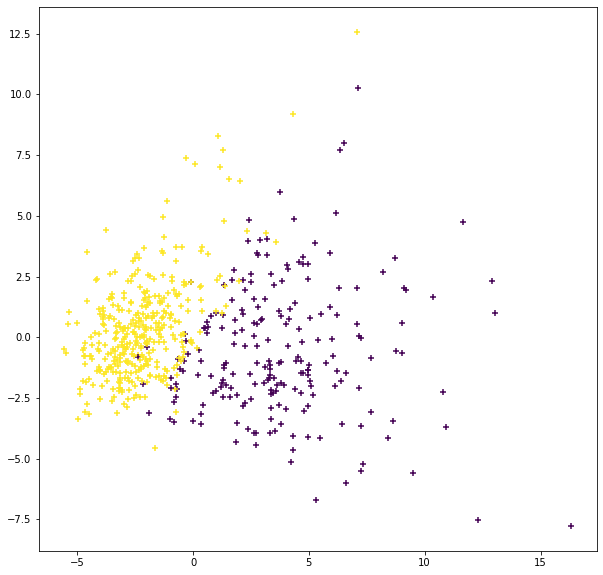

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=cancer['target'], marker='+')
plt.show()

In [14]:
X=df.copy()

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, cancer.target, test_size=0.2, random_state=10)

In [17]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9649122807017544